In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 



In [52]:
house_df = pd.read_csv('price.csv', encoding = 'ISO-8859-1')

In [53]:
house_df

id             date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900         3       1.00         1180   
1      6414100192  20141209T000000  538000         3       2.25         2570   
2      5631500400  20150225T000000  180000         2       1.00          770   
3      2487200875  20141209T000000  604000         4       3.00         1960   
4      1954400510  20150218T000000  510000         3       2.00         1680   
...           ...              ...     ...       ...        ...          ...   
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0           0     0  ...      7        1180   
1          7242     2.0           0     0  ...      7        2170   
2         10000     1.0           0     0  ...      6         770   
3          5000     1.0           0     0  ...      7        1050   
4          8080     1.0           0     0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21608      1131     3.0           0     0  ...      8        1530   
21609      5813     2.0           0     0  ...      8        2310   
21610      1350     2.0           0     0  ...      7        1020   
21611      2388     2.0           0     0  ...      8        1600   
21612      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21613 rows x 21 columns]

In [54]:
house_df.shape

(21613, 21)

In [55]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [56]:
house_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [57]:
# Check the dataframe inf

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [58]:
house_df.shape

(21613, 21)

In [59]:
# Statistical summary of the dataframe

house_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

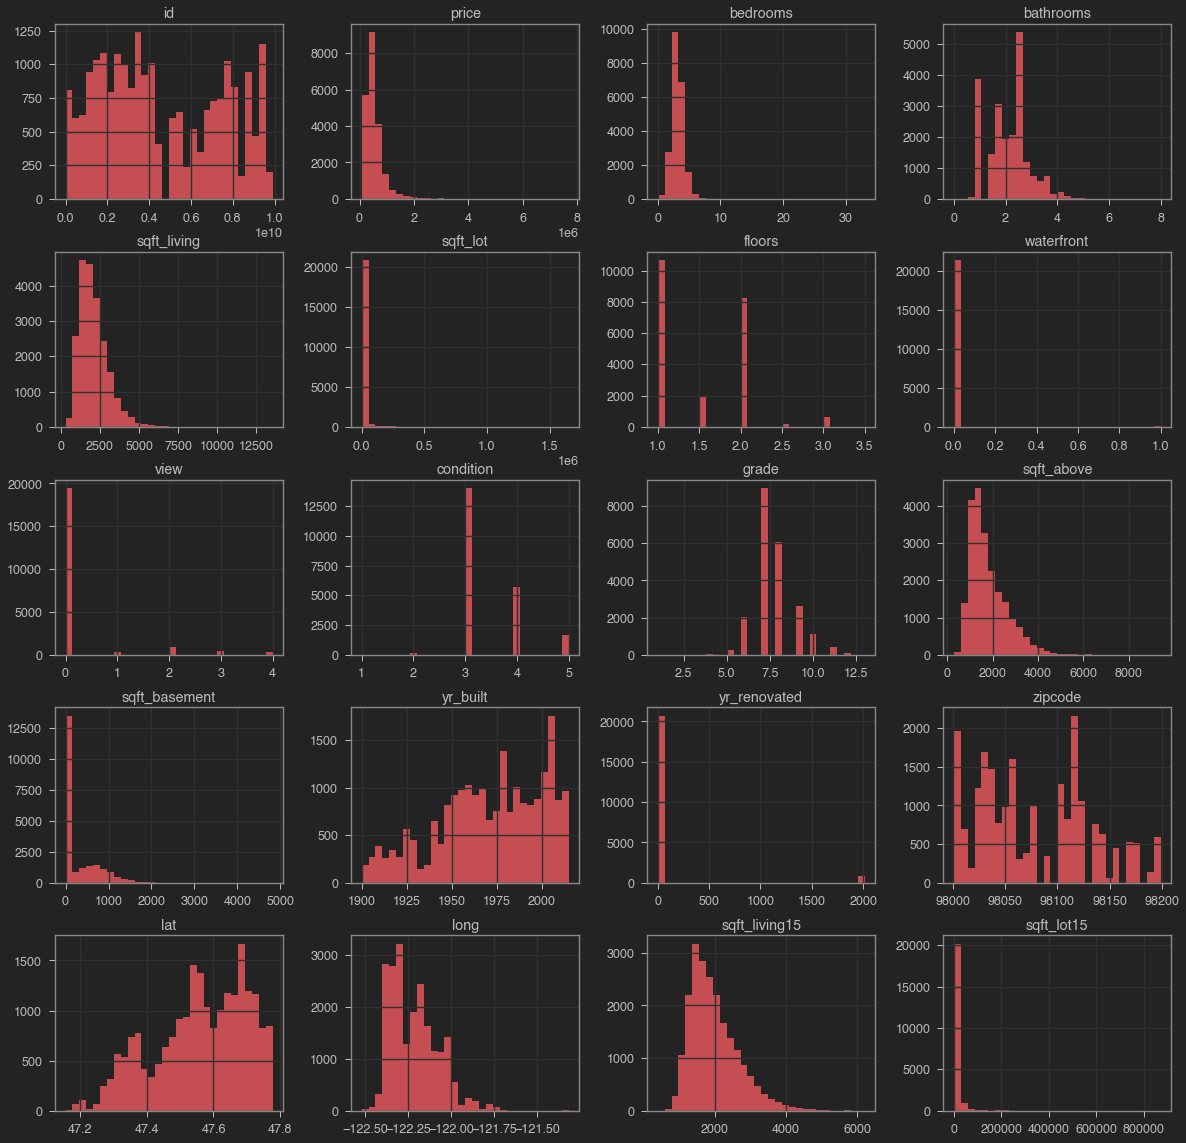

In [60]:
# Plot the histogram

house_df.hist(bins = 30, figsize = (20, 20), color = 'r');



<Figure size 1440x1440 with 0 Axes>

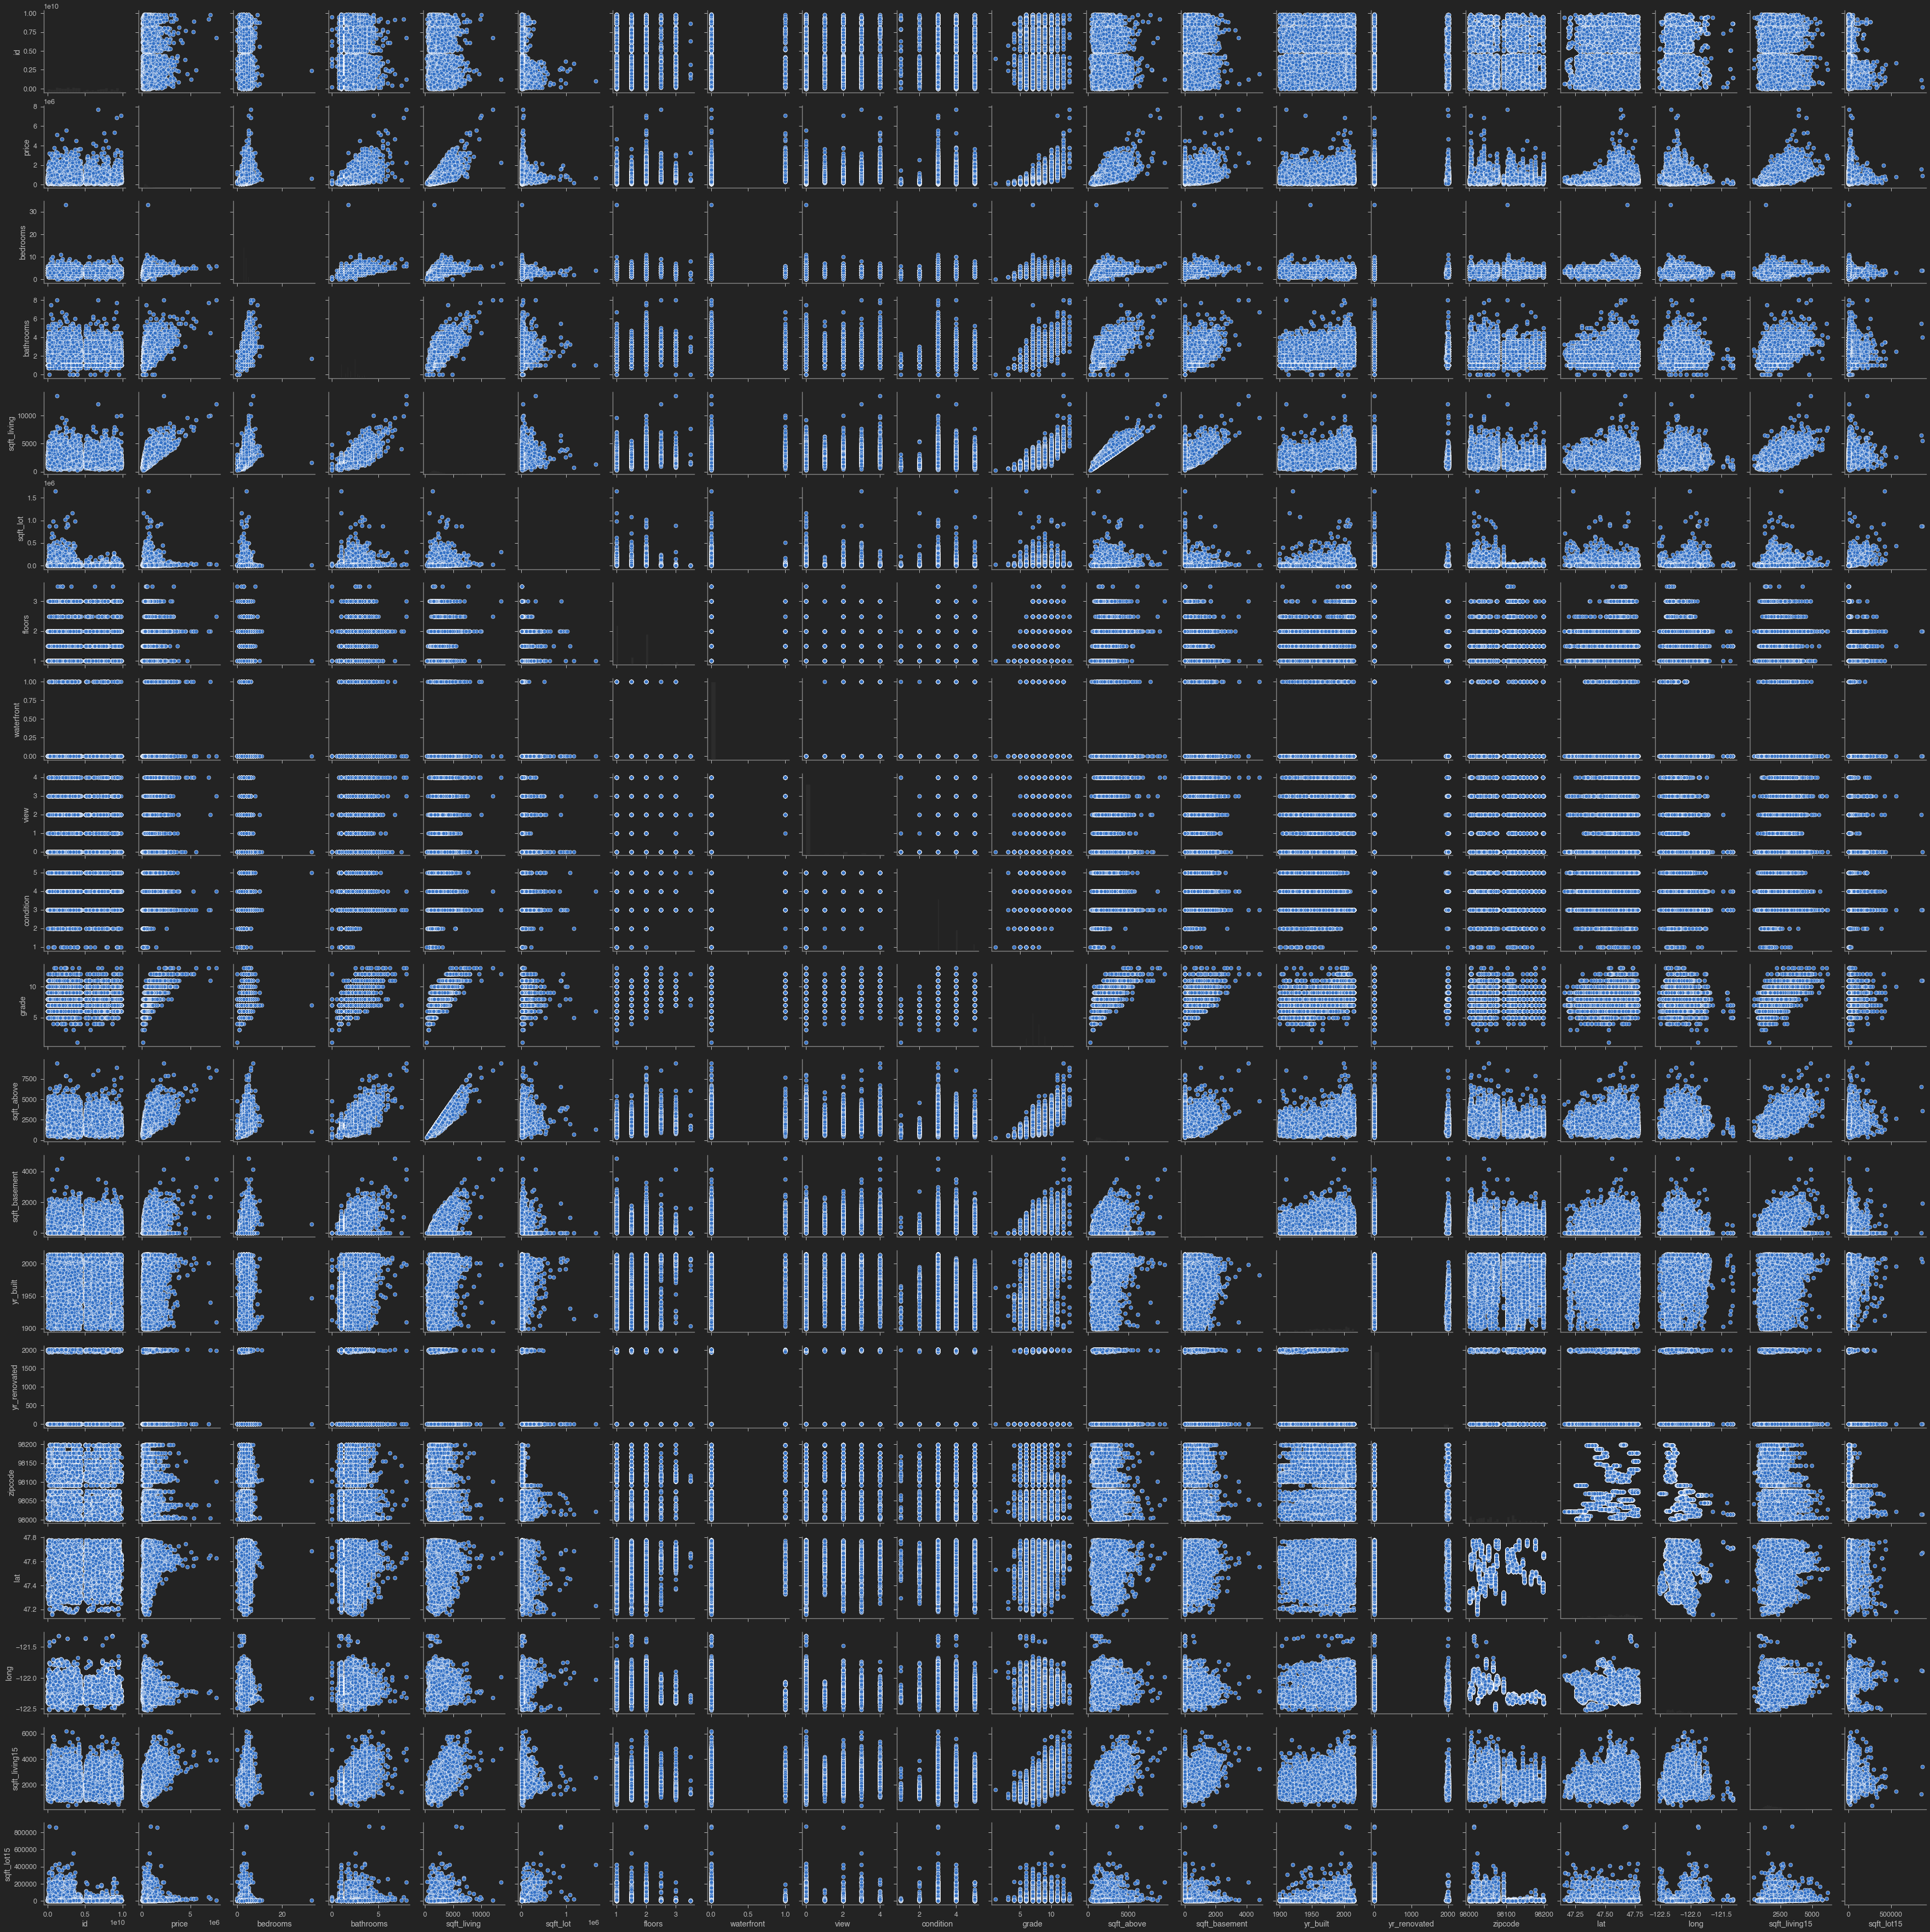

In [61]:
# Plot pairplot

plt.figure(figsize = (20,20))

sns.pairplot(house_df)

<AxesSubplot:>

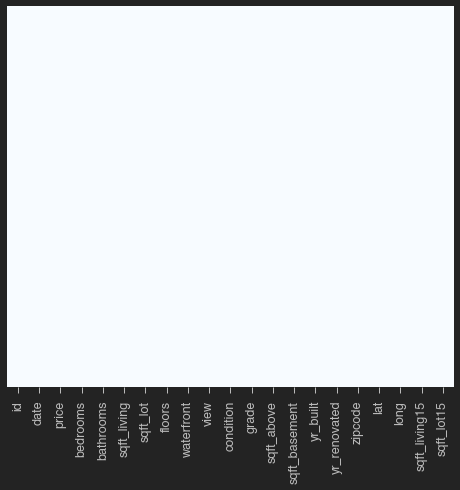

In [62]:
# check if there are any Null values

sns.heatmap(house_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

<AxesSubplot:xlabel='price', ylabel='bathrooms'>

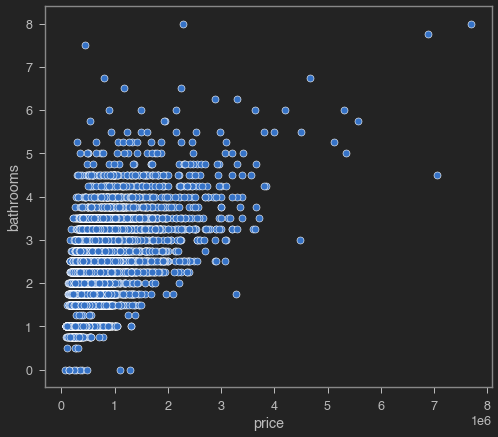

In [63]:
sns.scatterplot(data = house_df, x = 'price', y = 'bathrooms')

<AxesSubplot:>

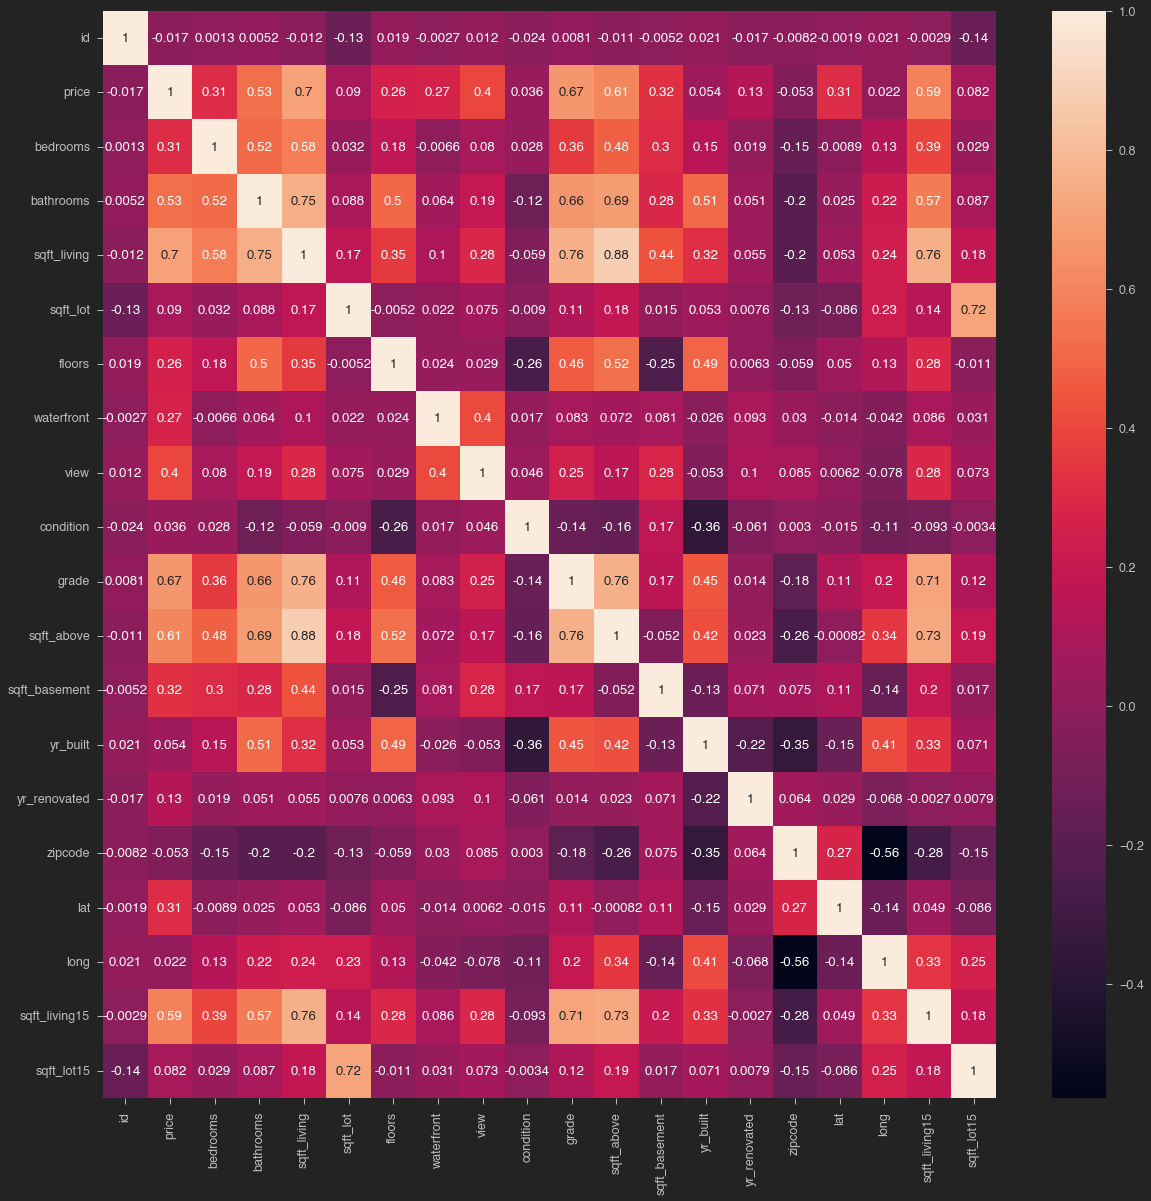

In [64]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True)

In [65]:
house_df_sample = house_df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]

In [66]:
house_df_sample

price  bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
0      221900         3       1.00         1180      5650        1180   
1      538000         3       2.25         2570      7242        2170   
2      180000         2       1.00          770     10000         770   
3      604000         4       3.00         1960      5000        1050   
4      510000         3       2.00         1680      8080        1680   
...       ...       ...        ...          ...       ...         ...   
21608  360000         3       2.50         1530      1131        1530   
21609  400000         4       2.50         2310      5813        2310   
21610  402101         2       0.75         1020      1350        1020   
21611  400000         3       2.50         1600      2388        1600   
21612  325000         2       0.75         1020      1076        1020   

       sqft_basement  yr_built  
0                  0      1955  
1                400      1951  
2                  0      1933  
3                910      1965  
4                  0      1987  
...              ...       ...  
21608              0      2009  
21609              0      2014  
21610              0      2009  
21611              0      2004  
21612              0      2008  

[21613 rows x 8 columns]

In [67]:
 #4: PERFORM DATA CLEANING AND FEATURE ENGINEERING
    
    
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [68]:
X = house_df[selected_features]

In [69]:
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0             3       1.00         1180      5650     1.0        1180   
1             3       2.25         2570      7242     2.0        2170   
2             2       1.00          770     10000     1.0         770   
3             4       3.00         1960      5000     1.0        1050   
4             3       2.00         1680      8080     1.0        1680   
...         ...        ...          ...       ...     ...         ...   
21608         3       2.50         1530      1131     3.0        1530   
21609         4       2.50         2310      5813     2.0        2310   
21610         2       0.75         1020      1350     2.0        1020   
21611         3       2.50         1600      2388     2.0        1600   
21612         2       0.75         1020      1076     2.0        1020   

       sqft_basement  
0                  0  
1                400  
2                  0  
3                910  
4                  0  
...              ...  
21608              0  
21609              0  
21610              0  
21611              0  
21612              0  

[21613 rows x 7 columns]

In [70]:
y = house_df['price']

In [71]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

In [72]:
X.shape

(21613, 7)

In [73]:
y.shape

(21613,)

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data

from sklearn.preprocessing import StandardScaler



In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [77]:
X_scaled.shape

(21613, 7)

In [78]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [79]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [80]:
y = y.values.reshape(-1,1)

In [81]:
y_scaled = scaler.fit_transform(y)

In [82]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [83]:
 #5: TRAIN A DEEP LEARNING MODEL WITH LIMITED NUMBER OF FEATURES
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25) 

In [84]:
X_train.shape

(16209, 7)

In [85]:
X_test.shape

(5404, 7)

In [86]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))


model.summary()

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               800       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [89]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 9.9345e-04
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.8772e-04
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 9.6516e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/100
260/260 [==============================] - 1s 4ms/step - loss: 0.0010 - val_loss: 9.7166e-04
Epoch 9/100
260/260 [==============================] - 1s 3ms/step - loss: 9.9358e-04 - val_loss: 9.8623e-04
Epoch 10/100
260/260 [==============================] - 1s 3ms/step

TASK #6: EVALUATE TRAINED DEEP LEARNING MODEL PERFORMANCE

In [90]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

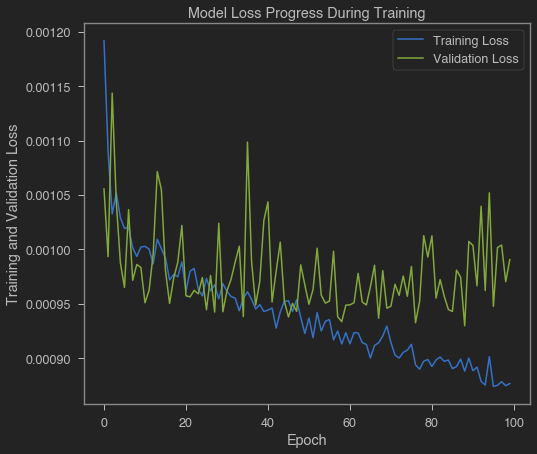

In [91]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [92]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

array([[180459.66]], dtype=float32)

Text(0, 0.5, 'True Values')

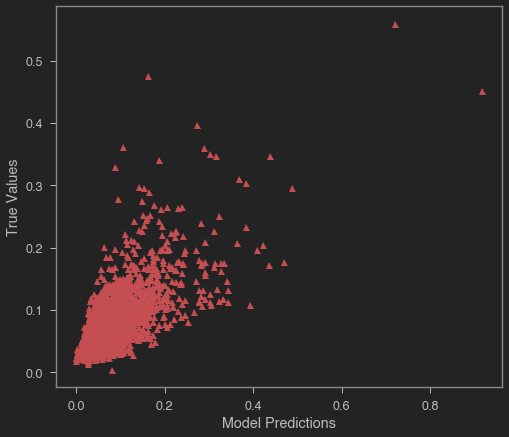

In [93]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')



In [94]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)



(0.0, 3000000.0)

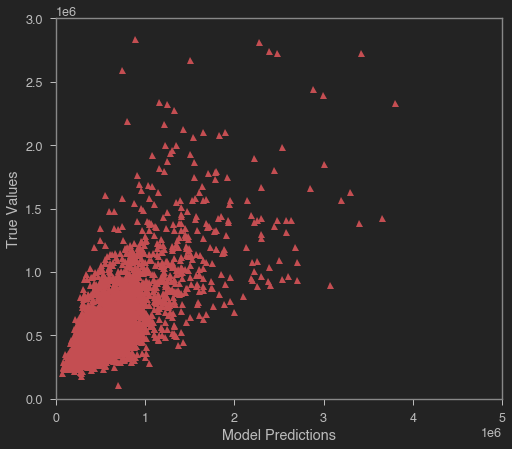

In [95]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [96]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [97]:
k

7

In [98]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 



RMSE = 243189.634 
MSE = 59141198133.44542 
MAE = 155267.15474070134 
R2 = 0.5610815882139131 
Adjusted R2 = 0.5605121981319074


TASK #7. TRAIN AND EVALUATE A DEEP LEARNING MODEL WITH INCREASED NUMBER OF FEATURES (INDEPENDANT VARIABLES)

In [99]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
y = house_df['price']

In [102]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [103]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim = 19, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [104]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [105]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0053 - val_loss: 0.0019
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 9.1295e-04 - val_loss: 8.4819e-04
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 7.8087e-04 - val_loss: 7.4889e-04
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 6.9763e-04 - val_loss: 6.9164e-04
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 6.5381e-04 - val_loss: 6.6875e-04
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 6.0996e-04 - val_loss: 5.7265e-04
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 5.6929e-04 - val_loss: 5.4150e-04
Epoch 9/100
260/260 [==============================] - 1s 3ms/step - loss: 5.5044e-04 - val_loss: 5.8592e-04
Epoch 10/100
260/260 [=============

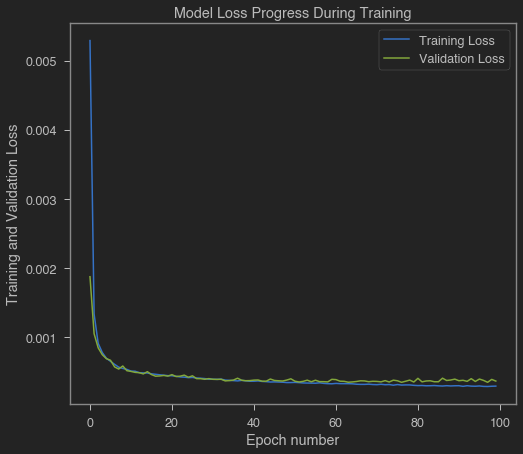

In [106]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

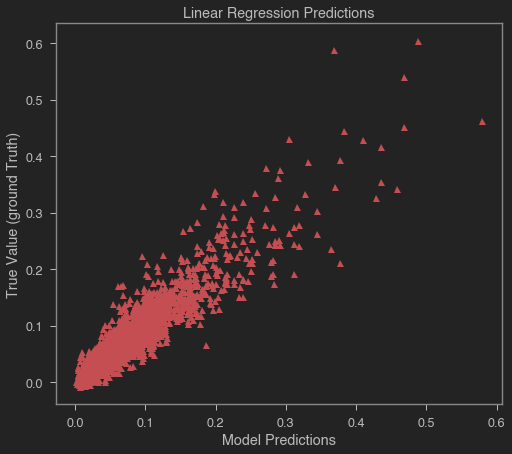

In [107]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [108]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)



In [110]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 



RMSE = 137219.598 
MSE = 18829218003.627346 
MAE = 85970.22068866812 
R2 = 0.8468100799326479 
Adjusted R2 = 0.8466113532016487
